### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from wordcloud import WordCloud

### Cargar los datos

In [2]:
df = pd.read_excel('RESPUESTA ENCUESTA DE INTELIGENCIA ARTIFICIAL.xlsx', sheet_name='responses.csv')
df.insert(0, 'Docente', df['First name'] + ' ' + df['Last name'])

df = df.drop(columns=['First name', 'Last name'])

df.columns.values[[1, 2, 3]] = ['Programa académico','UsaIA', 'AsignaturasIA_CantEstudiante']

df['TiposIA'] = df[['ChatGPT', 'Google Bard', 'Copilot (Microsoft)', 'Research Rabbit', 'Scite.ai', 'Perplexity.ai', 'Elicit', 'Grammarly', 'Turnitin AI Detection', 'Other']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
df = df.drop(columns=['ChatGPT','Google Bard', 'Copilot (Microsoft)', 'Research Rabbit', 'Scite.ai', 'Perplexity.ai', 'Elicit', 'Grammarly', 'Turnitin AI Detection', 'Other'])

df['AspectosUsabilidad'] = df[['Generación de contenido didáctico', 'Apoyo en la redacción de textos académicos','Búsqueda y análisis de información científica','Asistencia en la resolución de problemas o ejercicios','Evaluación y retroalimentación automatizada','Desarrollo de actividades interactivas','Simulación de casos y escenarios','Programación o desarrollo de proyectos técnicos','Other.1']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
df = df.drop(columns=['Generación de contenido didáctico', 'Apoyo en la redacción de textos académicos','Búsqueda y análisis de información científica','Asistencia en la resolución de problemas o ejercicios','Evaluación y retroalimentación automatizada','Desarrollo de actividades interactivas','Simulación de casos y escenarios','Programación o desarrollo de proyectos técnicos','Other.1'])

df['ImpactoClase'] = df[['¿Cómo ha impactado el uso de IA antes, durante y después de su uso en las clases?','Other.2']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
df = df.drop(columns=['¿Cómo ha impactado el uso de IA antes, durante y después de su uso en las clases?','Other.2'])

df['IAprendizajeEst'] = df[['¿Cómo ha impactado la IA en el aprendizaje de los estudiantes?','Other.3']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
df = df.drop(columns=['¿Cómo ha impactado la IA en el aprendizaje de los estudiantes?','Other.3'])

df['IA_PA'] = df[['¿Cómo ha influido la IA en el desarrollo del proyecto de aula?','Other.4']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
df = df.drop(columns=['¿Cómo ha influido la IA en el desarrollo del proyecto de aula?','Other.4'])

df.columns.values[[4, 5, 6, 7, 8, 9]] = ['BeneficiosIA','RetosIA', 'FormaciónAdicional', 'FormaciónIAGenerativaxEduc', 'EntrenamientoIAespecifica', 'Justificacion']


### Docentes

In [3]:
df['Docente'] = df['Docente'].str.lower().str.strip().str.replace(',', '').str.replace('.', '')
df['Docente'] = df['Docente'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('utf-8'))
df['Docente'] = df['Docente'].replace({
    'alfrredo yerman cortes verbel':'alfredo yerman cortes verbel',
    'annie beltran':'annie beltran barreto',
    'aquiles dionisio ortega':'aquiles dionisio ortega arrieta',
    'cecilia paillier':'cecilia paillier gonzalez',
    'cristian herrera':'cristian herrera atencio',
    'elvia alvarez':'elvia cecilia alvarez',
    'gustavo bustillo    rojas':'gustavo bustillo rojas',
    'ivan diaz gomez':'ivan guillermo diaz gomez',
    'jesus osorio':'jesus osorio romero',
    'juan carlos acosta':'juan carlos acosta jimenez',
    'luis vergara':'luis vergara gomez',
    'martha carrillo landazabal':'martha sofia carrillo landazabal',
    'nellly vasquez mesa':'nelly vasquez mesa',
    'verena villadiego':'verena villadiego beltran',
    'wualberto roca':'wualberto roca bechara',
})
df = df.drop_duplicates(subset='Docente', keep='first')

### Porcentaje de docentes que usan IA

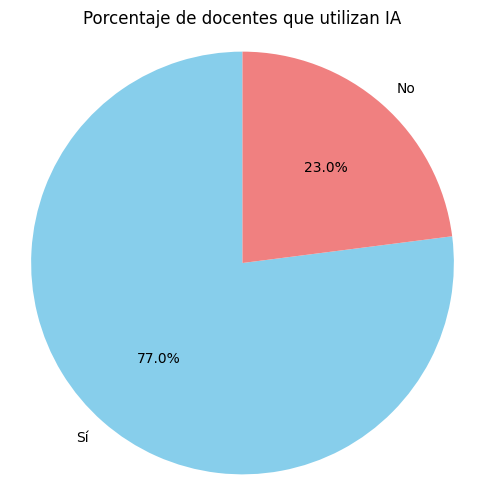

In [4]:
valores = df['UsaIA'].value_counts()
valores.index = valores.index.map({1: 'Sí', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Porcentaje de docentes que utilizan IA')
plt.axis('equal')
plt.show()

### Programa académico

In [5]:
df['Programa académico'] = df['Programa académico'].str.lower().str.strip().str.replace(',', '')
df['Programa académico'] = df['Programa académico'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('utf-8'))
df['Programa académico'] = df['Programa académico'].str.replace(r'\bing\b', 'ingenieria', case=False, regex=True)
df['Programa académico'] = df['Programa académico'].replace({
  'tecnologia en negocios internacionales':'tecnologia en gestion de negocios internacionales',
  'tg negocios internacionales':'tecnologia en gestion de negocios internacionales',
  'tecnologia en gestion negocios internacionales':'tecnologia en gestion de negocios internacionales',
  'negocios internacionales':'tecnologia en gestion de negocios internacionales',
  'tgni':'tecnologia en gestion de negocios internacionales',
  'tecnologia en gestion negocios internacionales':'tecnologia en gestion de negocios internacionales',
  'ingenierias- administracion':'administracion de empresas',
  'ingenieria industrial - ingenieria de sistemas':'ingenieria de sistemas',
  'tglgp - tgmkt - tgni - tgtyh':'varias tecnologias',
  'negocios marketing logistica':'varias tecnologias',
  'tecnologia en gestion finan':'tecnologia en gestion financiera',
  'gestion financiera':'tecnologia en gestion financiera',
  'profesional en admon de empresas tecnologia en gni glp gf gmk':'administracion de empresas',
  'administracion de empresas y administracion de sst':'administracion de empresas',
  'gestion de marketing':'tecnologia en gestion de marketing',
  'tgc tgf tglp tgmkt':'varias tecnologias',
  'tgc':'tecnologia en gestion contable',
  'tecnologia gestion contable':'tecnologia en gestion contable',
  'logistica portuaria y negocios internacionales':'varias tecnologias',
  'administracion y contable':'administracion de empresas',
  'gestion contable negocios turismo y administracion':'varias tecnologias',
  'contaduria publica':'contaduria',
  'tecnologia gestion financiera':'tecnologia en gestion financiera',
  'tec-produccion':'tecnologia en produccion industrial',
  'tecnologia en gestion ambiental industrial':'tecnologia en gestion ambiental',
  'bilinguismo- ingenieria & produccion industrial':'bilinguismo',
  'control de calidad':'tecnologia en control de calidad',
  'tecnologia control de calidad':'tecnologia en control de calidad',
  'psicologia trabajo social licenciatura en educacion infantil y promocion social':'psicologia',
  'tecnologia en seguridad e higiene':'tecnologia en seguridad e higiene ocupacional',
  'tecnologia en seguridad y cotrol':'varias tecnologias',
  'tsho':'tecnologia en seguridad e higiene ocupacional',
  'tecnologiaven produccion industrial':'tecnologia en produccion industrial',
  'tghyt':'tecnologia en gestion turistica y hotelera',
})

#Programas = df['Programa académico'].value_counts()
#print(Programas)

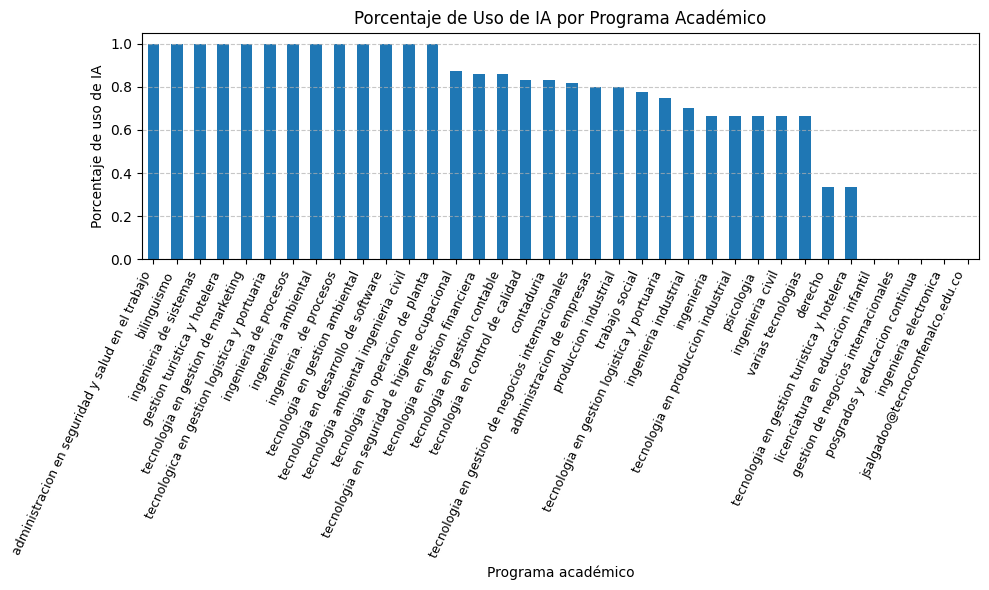

In [6]:
df.groupby('Programa académico')['UsaIA'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title='Porcentaje de Uso de IA por Programa Académico')
plt.ylabel('Porcentaje de uso de IA')
plt.title('Porcentaje de Uso de IA por Programa Académico')
plt.xticks(rotation=65, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Tipos de IA reportadas

6.28


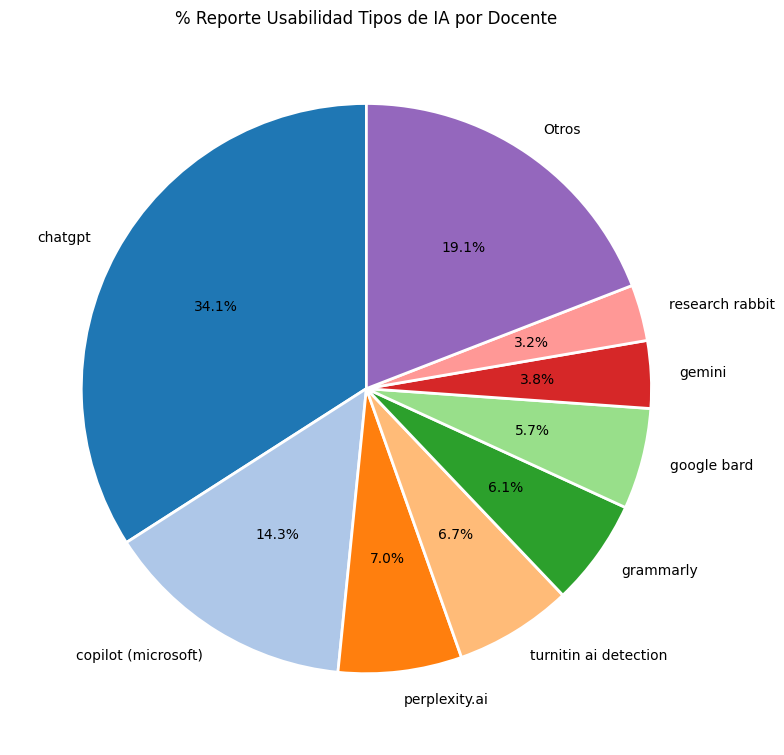

TiposIA
chatgpt                  107
copilot (microsoft)       45
perplexity.ai             22
turnitin ai detection     21
grammarly                 19
google bard               18
gemini                    12
research rabbit           10
Otros                     60
Name: count, dtype: int64


In [7]:
# Primero, combinamos todas las respuestas en una sola lista
TiposInteligencia = df['TiposIA'].str.split(',').explode()
TiposInteligencia= TiposInteligencia.str.lower().str.strip().str.replace(',', '')
TiposInteligencia = TiposInteligencia[TiposInteligencia.str.strip() != '']
TiposInteligencia= TiposInteligencia.replace({
    'deepzeek':'deepseek',
    'gemini-deepseek':'gemini',
    'compilation':'compilatio detection',
    'meta':'meta ai',
    'foros':'no aplica',
    'actividades interactivas':'no aplica',
    'videos didacticos':'no aplica',
    'gpt: revisor de normas apa':'chatgpt',
    'google ai estudio':'google bard',
    'invierno':'no aplica',
    'gronk':'grok'})

# Contabilizamos las respuestas

conteo_TiposIA= TiposInteligencia.value_counts()
umbral = 0.02 * conteo_TiposIA.sum()
conteo_agrupado = conteo_TiposIA[conteo_TiposIA >= umbral]
otros = conteo_TiposIA[conteo_TiposIA < umbral].sum()
conteo_agrupado["Otros"] = otros
print(umbral)

# Crear el gráfico
plt.figure(figsize=(8, 8))
conteo_agrupado.plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors, #paleta de colores
    startangle=90,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)
plt.title("% Reporte Usabilidad Tipos de IA por Docente")
plt.ylabel('')  # quitar etiqueta "count"
plt.tight_layout()
plt.show()

print(conteo_agrupado)


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\acmen\AppData\Local\Temp\ipykernel_42668\3552946052.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_expandido = df_expandido.assign(TiposIA=df_expandido['TiposIA'].str.split(',\s*')).explode('TiposIA')


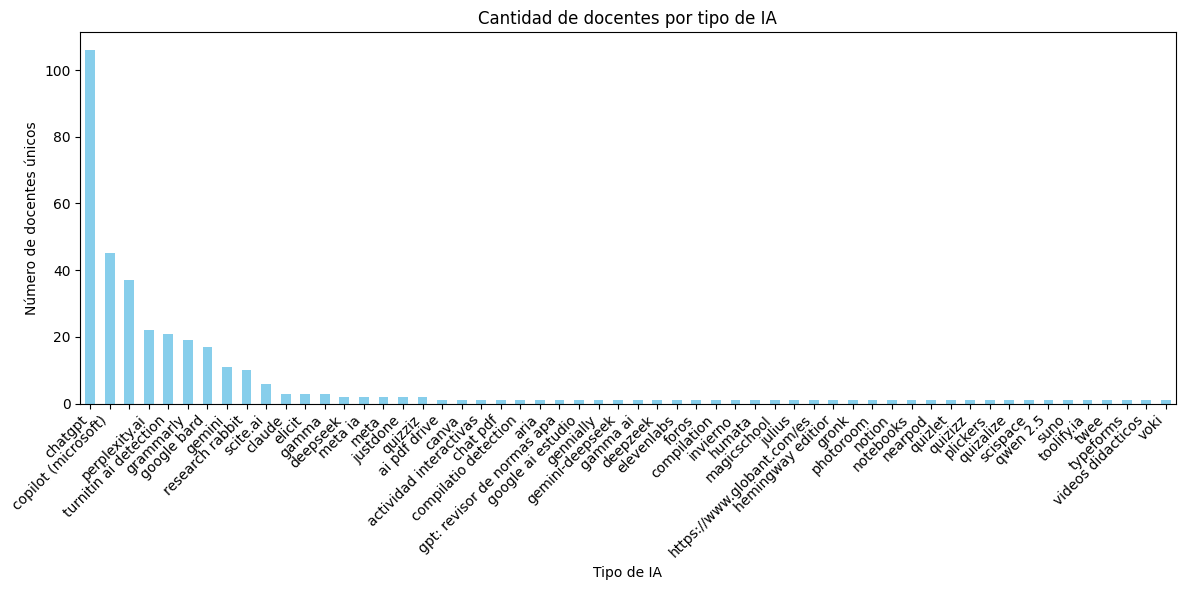

In [8]:
# Elimina nulos, normaliza caracteres, quita espacios y pasa todo a minúsculas
df_expandido = df.dropna(subset=['TiposIA']).copy()
df_expandido['TiposIA'] = df_expandido['TiposIA'].str.strip().str.lower()
df_expandido['TiposIA'] = df_expandido['TiposIA'].apply(
    lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('utf-8'))

# Divide múltiples IAs
df_expandido = df_expandido.assign(TiposIA=df_expandido['TiposIA'].str.split(',\s*')).explode('TiposIA')

# Vuelve a limpiar por si había variaciones en elementos después de explotar
df_expandido['TiposIA'] = df_expandido['TiposIA'].str.strip()

# Conteo y gráfico
conteo_por_ia = df_expandido.groupby('TiposIA')['Docente'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
conteo_por_ia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de docentes por tipo de IA')
plt.xlabel('Tipo de IA')
plt.ylabel('Número de docentes únicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Usabilidad (Modificar)

In [9]:
# Primero, combinamos todas las respuestas en una sola lista
AspectosUsabilidad = df['AspectosUsabilidad'].str.split(',').explode()
AspectosUsabilidad = AspectosUsabilidad.str.lower().str.strip().str.replace(',', '')
# AspectosUsabilidad= AspectosUsabilidad.replace({
#     'uso de ia para resolver problemas. redacción de preguntas':'asistencia en la resolución de problemas o ejercicios',
#     'búsqueda de conceptos':'hacer rastreos conceptuales y cuadros de comparación',
#     'ampliación de conceptos.':'hacer rastreos conceptuales y cuadros de comparación',
#     'verificar el plagio o la autenticación en los trabajos escritos':'verificar si el contenido de un documento se hizo con una ia',
#     'elaboración de ítem':'generación de contenido didáctico',
#     'evaluación de contenido':'evaluación y retroalimentación automatizada',
#     'ej: solicitud de mejoras en una formula de búsqueda de análisis bibliométrico':'búsqueda y análisis de información científica',
#     'preguntas puntuales':'asistencia en la resolución de problemas o ejercicios',
#     'código en python y matlab':'programación o desarrollo de proyectos técnicos',
#     'establecer ventajas competitivas  a través de soluciones comerciales específicas impulsadas por ia':'asistencia en la resolución de problemas o ejercicios'
# })

conteo_AspectosUsabilidad = AspectosUsabilidad.value_counts()
print(conteo_AspectosUsabilidad)


# Crear el gráfico
# plt.figure(figsize=(12, 8))
# conteo_AspectosUsabilidad.plot.pie(
#     autopct='%1.1f%%',
#     colors=plt.cm.tab20.colors, #paleta de colores
#     startangle=44,
#     wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
# )
# plt.title("% Reporte aspectos usabilidad")
# plt.ylabel('')  # quitar etiqueta "count"
# plt.tight_layout()
# plt.show()

AspectosUsabilidad
generación de contenido didáctico                                                                     92
simulación de casos y escenarios                                                                      66
búsqueda y análisis de información científica                                                         53
desarrollo de actividades interactivas                                                                53
apoyo en la redacción de textos académicos                                                            39
                                                                                                      37
asistencia en la resolución de problemas o ejercicios                                                 35
evaluación y retroalimentación automatizada                                                           22
programación o desarrollo de proyectos técnicos                                                       16
creación de logos                   

### Retos IA

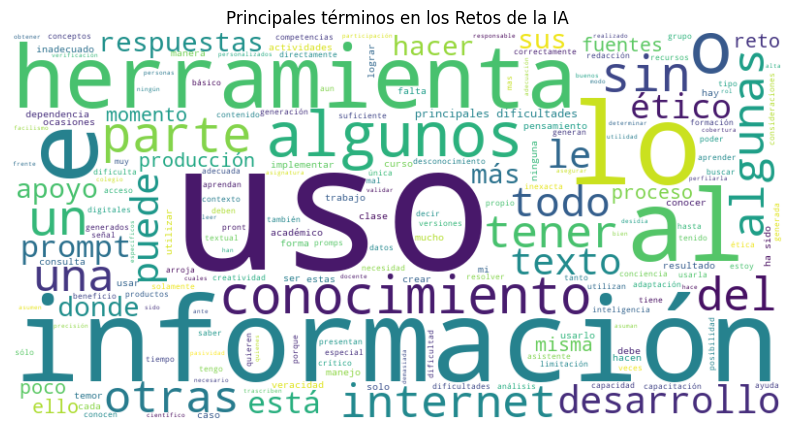

In [10]:
RetosIA = df['RetosIA'].explode().dropna()

# Eliminar los valores ruidosos
patron_ruido = r'^[a-z]{3,}$'
RetosIA = RetosIA.str.lower().str.strip().str.replace(',', '')
RetosIA = RetosIA[~RetosIA.str.fullmatch(patron_ruido, na=False)]

# #Eliminar filas que no son retos
# indices_a_eliminar = [1, 2, 18, 68, 70, 42, 12]  # reemplaza con los índices reales

# # Eliminar esas filas de la Serie
# RetosIA = RetosIA.drop(index=indices_a_eliminar)

#Eliminar palabras que no son retos
RetosIA = RetosIA.str.replace(r'\by\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bde\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bel\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bla\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bia\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\blas\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\ben\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\blos\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bque\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bpor\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bpara\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bcomo\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bestudiante\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bestudiantes\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bsu\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bse\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\besta\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bpero\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bcon\b', '', regex=True).str.strip()


texto = ' '.join(RetosIA.dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Principales términos en los Retos de la IA")
plt.show()


### IA en el proyecto de aula (modificar)

IA_PA
ha permitido mejorar la recolección y análisis de datos                  40
no se ha utilizado en el proyecto de aula                                37
ha sido útil en la redacción y presentación de resultados                22
ha facilitado la formulación y desarrollo del proyecto de aula           20
no he podido evidenciar para bien o mal... aun                            1
en la revisión de los entregables                                         1
hasta el momento no lo he utilizado                                       1
mal puesto que los estudiantes copian y pegan los resultados de la ia     1
Name: count, dtype: int64


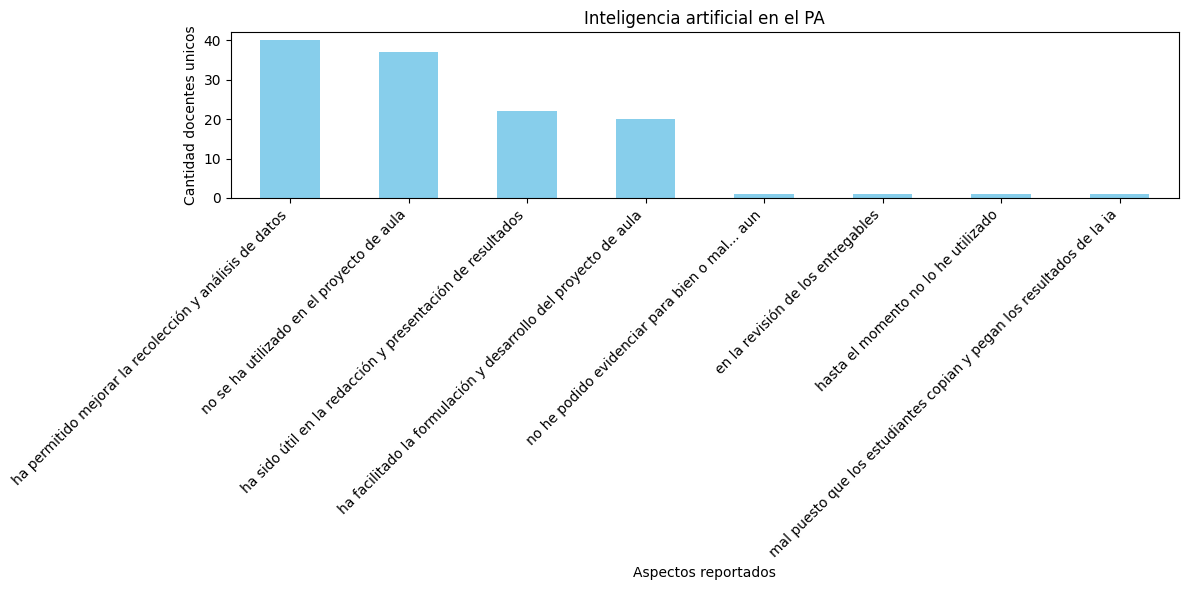

In [22]:
IA_PA = df['IA_PA'].explode()
IA_PA = IA_PA.str.lower().str.strip().str.replace(',', '').dropna()
IA_PA = IA_PA[IA_PA.str.strip() != '']

Conteo_IA_PA = IA_PA.value_counts()
print(Conteo_IA_PA)

plt.figure(figsize=(12, 6))
Conteo_IA_PA.plot(kind='bar', color='skyblue')
plt.title('Inteligencia artificial en el PA')
plt.xlabel('Aspectos reportados')
plt.ylabel('Cantidad docentes unicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

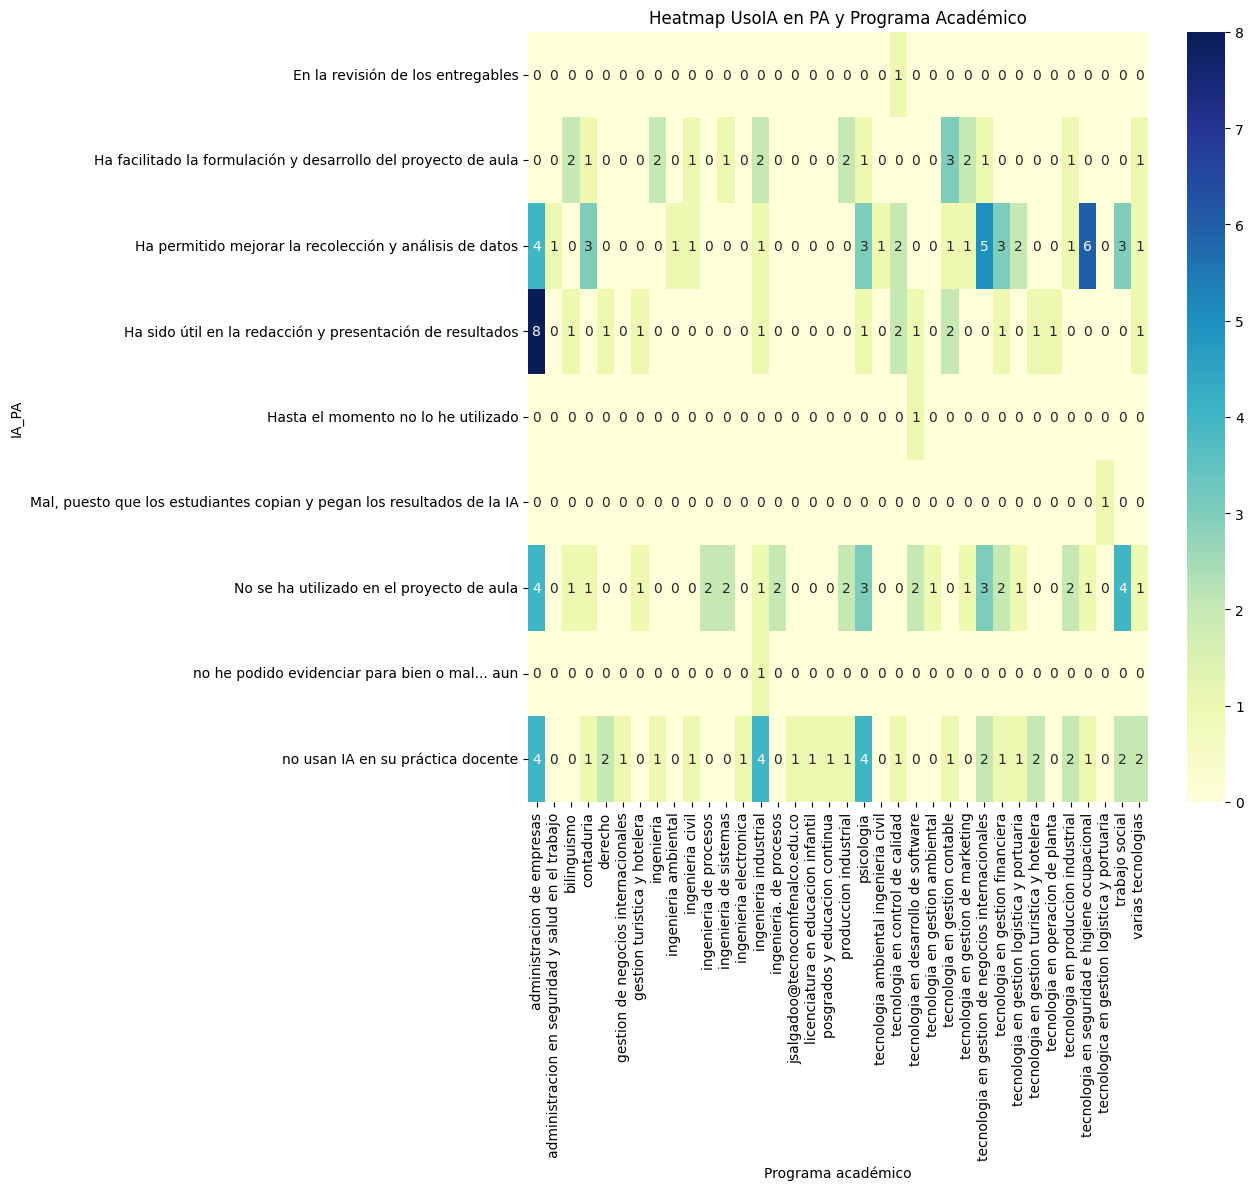

In [34]:
df['IA_PA'] = df['IA_PA'].replace(r'^\s*$', 'no usan IA en su práctica docente', regex=True)
tabla_cruzada = pd.crosstab(df['IA_PA'], df['Programa académico'])
plt.figure(figsize=(10, 10))
sns.heatmap(tabla_cruzada, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Mostrar el gráfico
plt.title("Heatmap UsoIA en PA y Programa Académico")
plt.show()

### Docentes que no usan IA

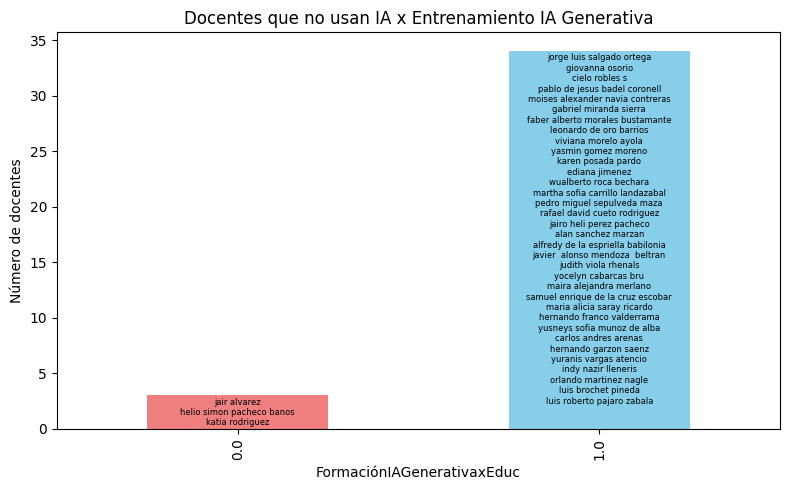

In [35]:
# Filtrar docentes que no usan IA
df_filtrado = df[df['UsaIA'] == False]

# Agrupar por "Requieren entrenamiento"
grupo = df_filtrado.groupby('FormaciónIAGenerativaxEduc')['Docente'].agg(['count', list])

# Graficar
ax = grupo['count'].plot(kind='bar', 
                         color=['lightcoral', 'skyblue'],
                         figsize=(8, 5),
                         ylabel='Número de docentes',
                         title='Docentes que no usan IA x Entrenamiento IA Generativa')

# Añadir etiquetas con nombres sobre cada barra
for i, (Docente, total) in enumerate(zip(grupo['list'], grupo['count'])):
    etiqueta = '\n'.join(Docente)
    ax.text(i, total-0.2, etiqueta, ha='center', va='top', fontsize=6, rotation=0)

plt.tight_layout()
plt.show()

### Formación adicional docentes que usan IA

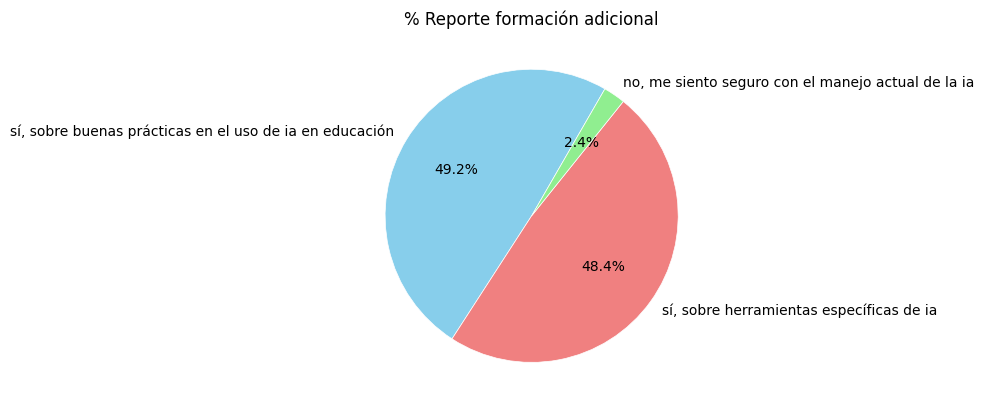

In [36]:
FormaciónD = df['FormaciónAdicional'].explode()
FormaciónD = FormaciónD.str.lower().str.strip()
FormaciónD = FormaciónD.replace({})


conteo_FormaciónD = FormaciónD.value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
conteo_FormaciónD.plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
    startangle=60,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}
)
plt.title("% Reporte formación adicional")
plt.ylabel('')  # quitar etiqueta "count"
plt.tight_layout()
plt.show()

### Programa académico y formación adicional

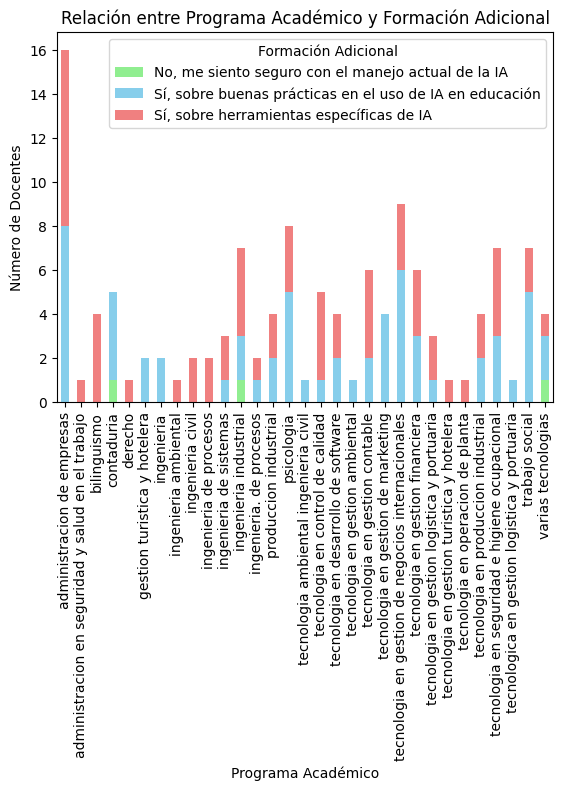

In [38]:
# Crear una tabla de frecuencia
tabla_frecuencia = pd.crosstab(df['Programa académico'], df['FormaciónAdicional'])

# Generar la gráfica de barras
tabla_frecuencia.plot(kind='bar',
                      stacked=True,
                      color=['lightgreen', 'skyblue','lightcoral'],)
plt.title('Relación entre Programa Académico y Formación Adicional')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Docentes')
plt.legend(title='Formación Adicional')
plt.show()

##### cristian herrera atencio, favio andres arcia tous, orlando perinan florez son los docentes que no requieren formación adicional porque porque se sienten seguros del dominio sobre la IA

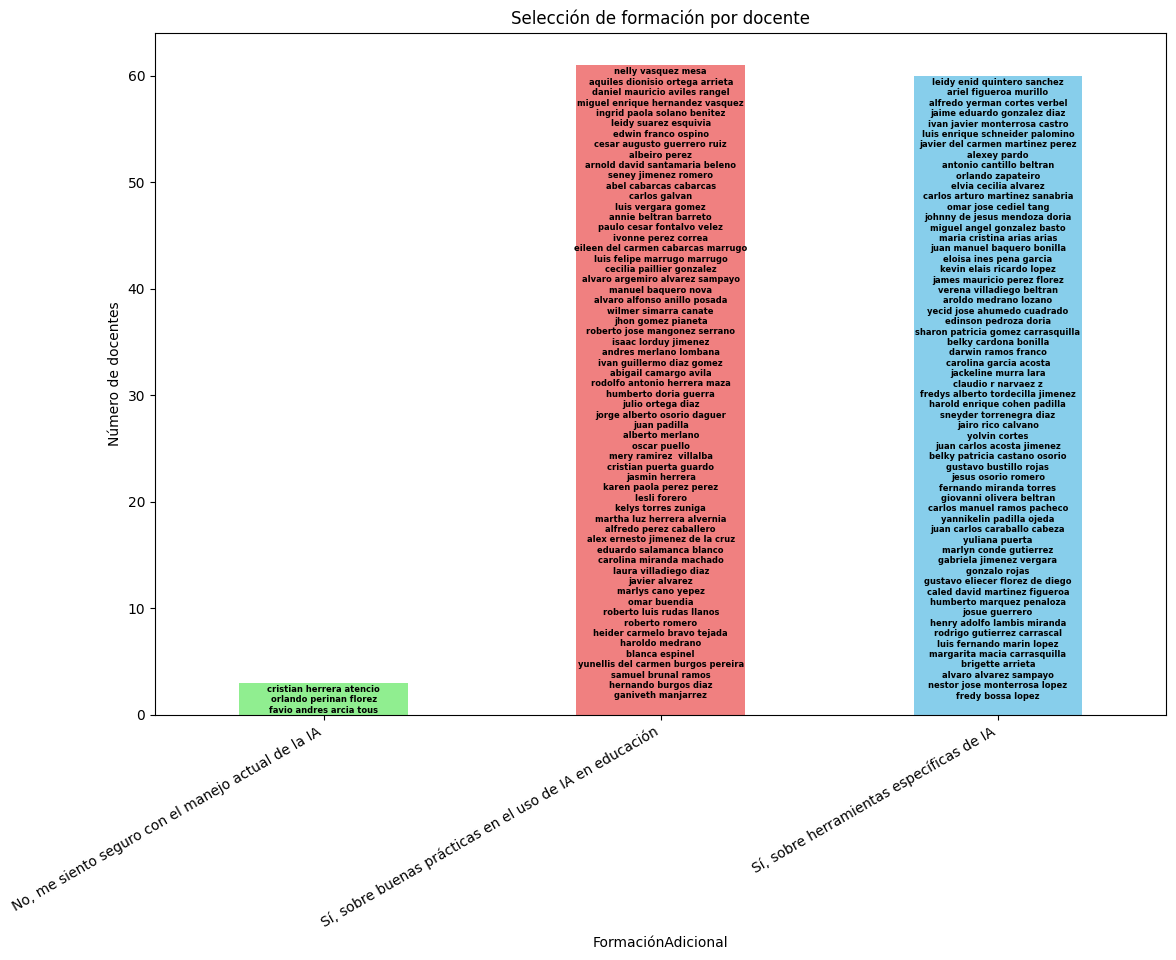

In [77]:
# Filtrar docentes que no usan IA
df_filtrado = df[df['UsaIA'] == True]

# Agrupar por "Requieren entrenamiento"
grupo = df_filtrado.groupby('FormaciónAdicional')['Docente'].agg(['count', list])

# Graficar
ax = grupo['count'].plot(kind='bar', 
                         color=['lightgreen','lightcoral', 'skyblue'],
                         figsize=(12, 9.7),
                         ylabel='Número de docentes',
                         title='Selección de formación por docente')

# Añadir etiquetas con nombres sobre cada barra
for i, (Docente, total) in enumerate(zip(grupo['list'], grupo['count'])):
    etiqueta = '\n'.join(Docente)
    ax.text(i, total-0.2, etiqueta, ha='center', va='top', fontsize=6, rotation=0,fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

### Asginaturas IA

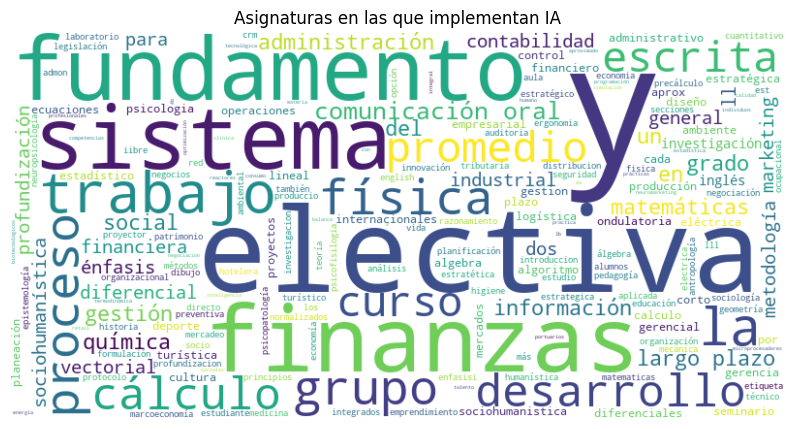

In [ ]:
AsignaturasIA_CantEstudiante = df['AsignaturasIA_CantEstudiante']
patron_ruido = r'^[a-z]{3,}$'
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.lower().str.strip().str.replace(',', '').dropna()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante[~AsignaturasIA_CantEstudiante.str.fullmatch(patron_ruido, na=False)]
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bestudiantes\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bclase\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bde\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bii\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\baproximadamente\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\biii\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\buno\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\btotal\b', '', regex=True).str.strip()


texto = ' '.join(AsignaturasIA_CantEstudiante.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Asignaturas en las que implementan IA")
plt.show()

### Justificacion

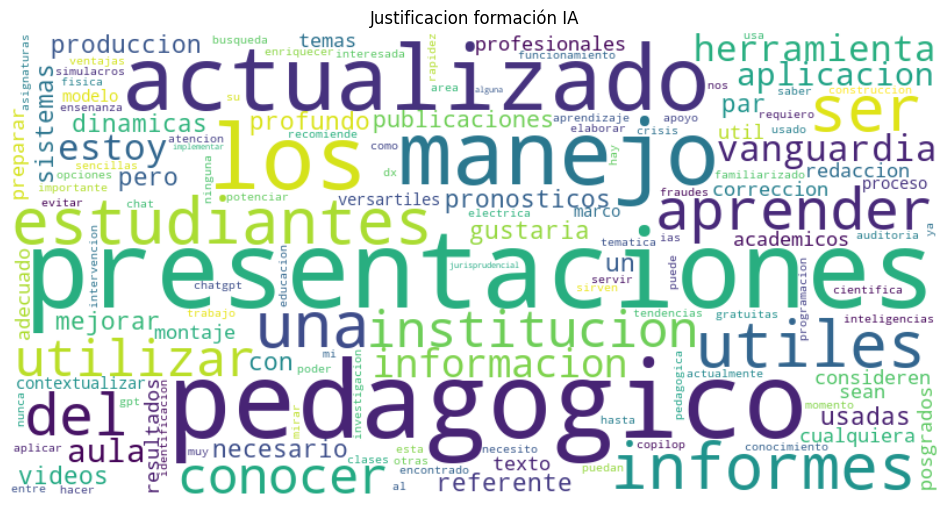

In [40]:
Justificacion = df['Justificacion']
Justificacion = df['Justificacion'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('utf-8'))
patron_ruido = r'^[a-z]{3,}$'
Justificacion = Justificacion.str.lower().str.strip().str.replace(',', '').dropna()
Justificacion = Justificacion[~Justificacion.str.fullmatch(patron_ruido, na=False)]
Justificacion = Justificacion.str.replace(r'\bpara\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bque\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bde\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bel\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bla\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\ben\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\blas\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bmas\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\by\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bestar\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\btodas\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bclase\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\be\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bpueda\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bia\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bvarias\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bconozco\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bes\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\btener\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bse\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bporque\b', '', regex=True).str.strip()
Justificacion = Justificacion.str.replace(r'\bpermitan\b', '', regex=True).str.strip()







texto = ' '.join(Justificacion.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Justificacion formación IA")
plt.show()